In [10]:
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.optimize import curve_fit
from scipy.integrate import cumulative_trapezoid
from scipy.interpolate import RegularGridInterpolator
import pandas as pd
import random
import math
import copy
from typing import Annotated, Any, Callable
from pydantic import BaseModel, Field, WithJsonSchema
import pydantic
import ipywidgets as widgets
import random
from typing import (
    Any, Callable, Optional, Sequence, Union, Tuple, Dict, List
)

In [4]:
%load_ext autoreload
%autoreload 2

import sys
for p in ['../src']:
    if p not in sys.path:
        sys.path.append(p)
        
import spikeml as sml
from spikeml.utils.nb_util import xdisplay, Markup
from spikeml.core.signal import signal_dc, signal_pulse, encode1_onehot, encode_onehot, signal_ranges, signal_unique, signal_ranges, signal_changes, mean_per_input
from spikeml.core.ngram import build_ngram, ngram_find, ngram_msample, print_ngrams
from spikeml.core.params import SSensorParams

from spikeml.plot.plot_util import plot_hist, plot_data, plot_lidata, plot_input, plot_xt, plot_mt, plot_spikes, imshow_matrix, imshow_nmatrix


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# spike

SSensorParams({'g': 1, 'e_err': 5, 'vmin': 0, 'vmax': 1, 'name': None, 'e_z': 2, 'pf': 1, 'pmax': 1, 'upsample_method': <UpsampleMethod.REPEAT: 2>})
0 [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ] [0 0 0 0 1 1 1 1 1 1]
1 [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ] [0 0 0 1 0 0 1 1 1 1]
2 [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ] [0 0 0 1 1 1 0 1 0 1]
3 [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ] [0 0 0 1 1 0 1 1 0 1]
4 [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ] [0 1 1 1 1 1 0 1 1 1]
5 [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ] [0 0 1 1 1 1 1 1 1 1]
6 [0.         0.11111111 0.22

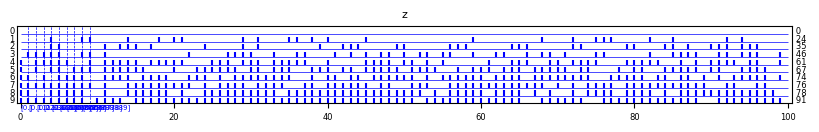

In [13]:

from spikeml.core.spikes import pspike, spike

def test_spike():
    params = SSensorParams()
    print(params)
    s = np.linspace(params.vmin,params.vmax,num=10)
    ss = s[..., np.newaxis]
    data = []
    for t in range(0,100):
        sz = spike(s, params)
        print(t, s, sz)
        data.append(sz)
        
    plot_spikes(data, title='z', name=None, callback=lambda ax: plot_input(ss,ax=ax))

    
if __name__ == '__main__':  
    test_spike()


SSensorParams:g=1,e_err=5,vmin=0,vmax=1,e_z=2,pf=1,pmax=1


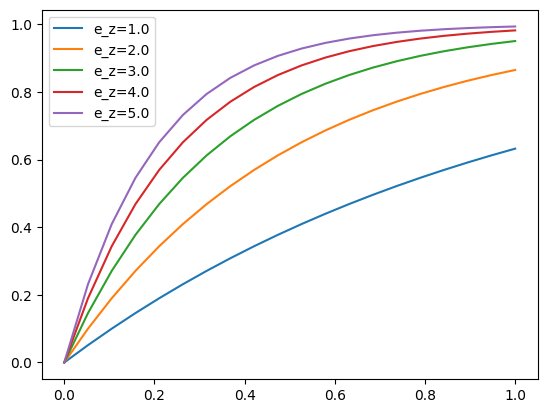

''

In [9]:
def plot_pspike():
    params = SSensorParams()
    print(params.fmt())
    ss = np.stack([np.linspace(params.vmin,params.vmax,num=20)],axis=1)
    #print(ss)
    for e_z in np.linspace(1,5,num=5):
        data = []
        params = SSensorParams(e_z=e_z)
        #print(params)
        x = []
        for s in ss:
            p = pspike(s, params)
            #print(s, p)
            x.append(s[0])
            data.append(p)
        plt.plot(x, data, label=f'e_z={e_z}')
    plt.legend()
    plt.show()
    
    
if __name__ == '__main__':  
    plot_pspike()
_